# Login the AWS related configuration

In [1]:
import os

aws_access_key_id = os.environ.get("AWS_ACCESS_KEY_ID")
aws_secret_access_key = os.environ.get("AWS_SECRET_ACCESS_KEY")

os.environ['AWS_ACCESS_KEY_ID'] = aws_access_key_id
os.environ['AWS_SECRET_ACCESS_KEY'] = aws_secret_access_key
os.environ['AWS_REGION'] = 'ap-northeast-2'

# Import Sagemaker Runtime

In [2]:
import boto3

boto_session = boto3.Session(
    aws_access_key_id = aws_access_key_id,
    aws_secret_access_key = aws_secret_access_key,
    region_name = os.environ['AWS_REGION']
)

sm_runtime = boto_session.client("sagemaker-runtime")

# Simple Visualizer

In [3]:
import json
import requests
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from io import BytesIO

def visualize_detection(detection_result, img, color="red"):
    draw = ImageDraw.Draw(img)
    # Extract detection data
    detections = detection_result['output'][0]
    boxes = detections['boxes']
    labels = detections['text']

    # Draw bounding boxes and labels
    for box, label in zip(boxes, labels):
        x1, y1, x2, y2 = box
        # Draw rectangle
        draw.rectangle([x1, y1, x2, y2], outline=color, width=4)
        # Draw label background
        draw.rectangle([x1, y1-10, x1+len(label)*10, y1], fill=color)
        # Draw text
        draw.text((x1+5, y1-10), label, fill="black")

    # Display results
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Text based inference
We will find `strawberry` in the following image

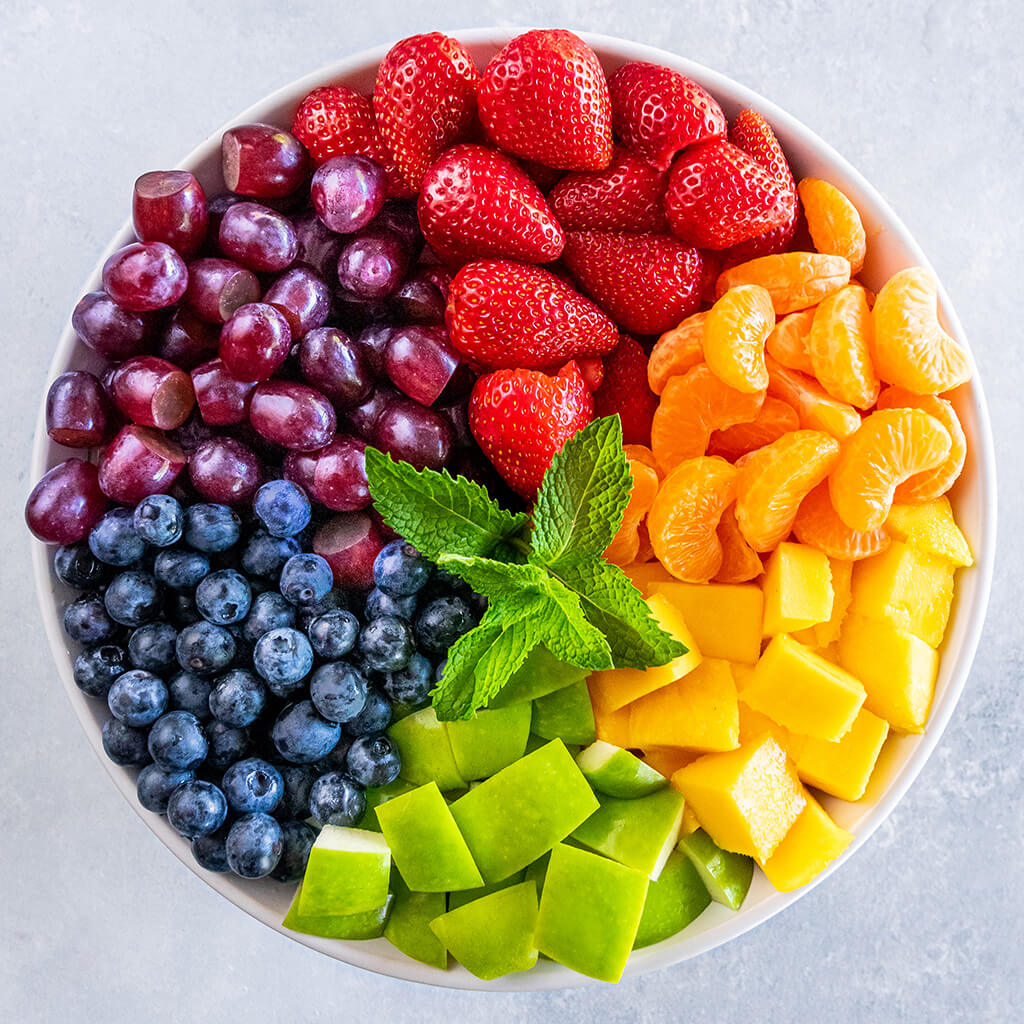

In [4]:
image_url = "https://www.californiastrawberries.com/wp-content/uploads/2021/05/Rainbow-Fruit-Salad-1024.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")
image

In [5]:
json_string = '{"search_image": "https://www.californiastrawberries.com/wp-content/uploads/2021/05/Rainbow-Fruit-Salad-1024.jpg", \
"queries": [{"prompt_image": "https://www.californiastrawberries.com/wp-content/uploads/2021/05/Rainbow-Fruit-Salad-1024.jpg", \
"prompts": [{"text": "strawberry", "box": [], "box_threshold": 0.1, "multimodal_threshold": 0.22}]}]}'

response = sm_runtime.invoke_endpoint(
    EndpointName="zero-marketplace",
    Body=json_string,
    ContentType="application/json",
)

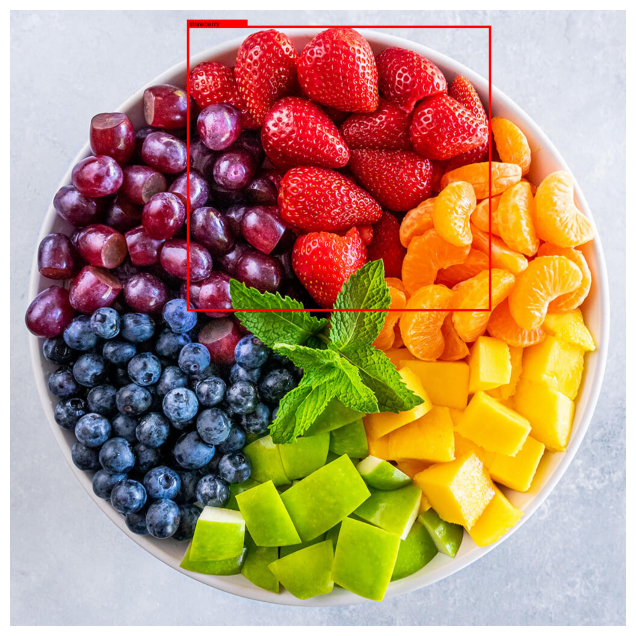

In [6]:
detection_result = json.load(response["Body"])
visualize_detection(detection_result, image)

# Semantic based inference
We will find `potato` in the following image. Note that box is only used for inference.

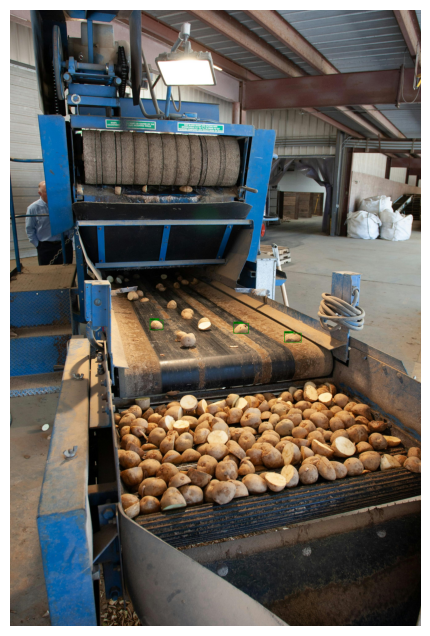

In [7]:
image_url = "https://images.pexels.com/photos/2889199/pexels-photo-2889199.jpeg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")
ground_truth = {'output': 
    [
        {
            'boxes': [
                [1779.5828857421875, 2096.025634765625, 1891.6937255859375, 2158.37548828125], 
                [1450.27734375, 2034.58447265625, 1549.1326904296875, 2100.104736328125], 
                [907.7588500976562, 2012.329833984375, 994.8242797851562, 2078.3623046875]
            ], 
            'text': ['potato', 'potato', 'potato', 'potato']
        }
    ]
}
visualize_detection(ground_truth, image, color="green") # Visualize bounding box with ground_truth

In [8]:
json_string = '{"search_image": "https://images.pexels.com/photos/2889199/pexels-photo-2889199.jpeg", \
"queries": [{"prompt_image": "https://images.pexels.com/photos/2889199/pexels-photo-2889199.jpeg", \
"prompts": [ \
{"text": "potato", "box": [1779.5828857421875, 2096.025634765625, 1891.6937255859375, 2158.37548828125], "box_threshold": 0.1, "multimodal_threshold": 0.2}, \
{"text": "potato", "box": [1450.27734375, 2034.58447265625, 1549.1326904296875, 2100.104736328125], "box_threshold": 0.1, "multimodal_threshold": 0.2}, \
{"text": "potato", "box": [907.7588500976562, 2012.329833984375, 994.8242797851562, 2078.3623046875], "box_threshold": 0.1, "multimodal_threshold": 0.2} \
]}]}'

response = sm_runtime.invoke_endpoint(
    EndpointName="zero-marketplace",
    Body=json_string,
    ContentType="application/json",
)

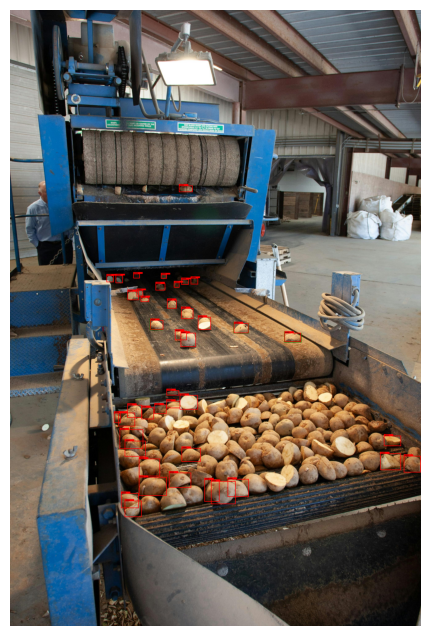

In [9]:
detection_result = json.load(response["Body"])
visualize_detection(detection_result, image)

# Semantic based inference (Advanced)
We will find `elephant` and `giraffe` in the following image. Note that semantic prompts can be extracted from other images.

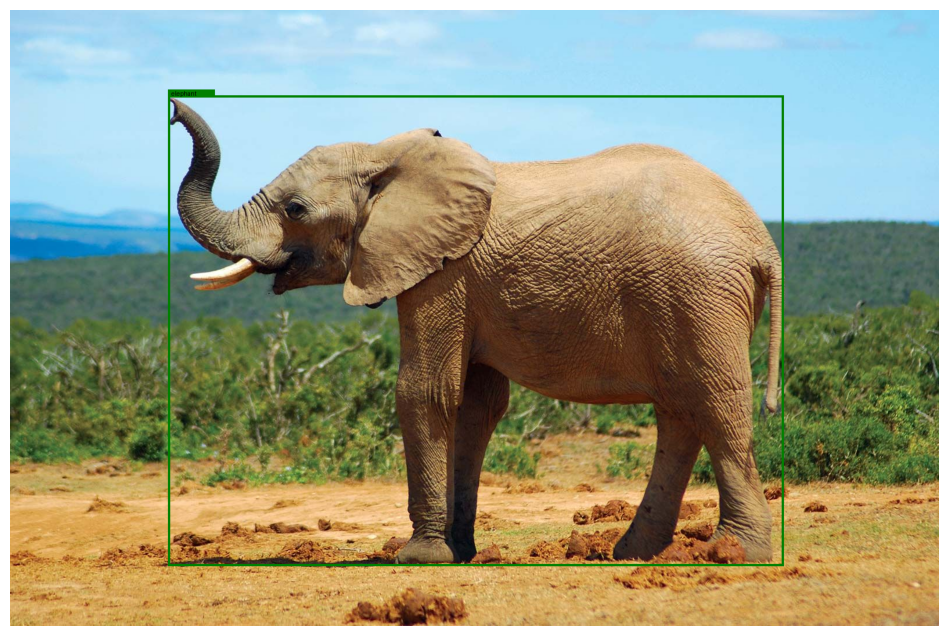

In [10]:
image_url = "https://cdn.britannica.com/02/152302-050-1A984FCB/African-savanna-elephant.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")
ground_truth = {'output': 
    [
        {
            'boxes': [
                [272.6648254394531, 147.77137756347656, 1332.71044921875, 958.507568359375]
            ], 
            'text': ['elephant']
        }
    ]
}
visualize_detection(ground_truth, image, color="green") # Visualize bounding box with ground_truth

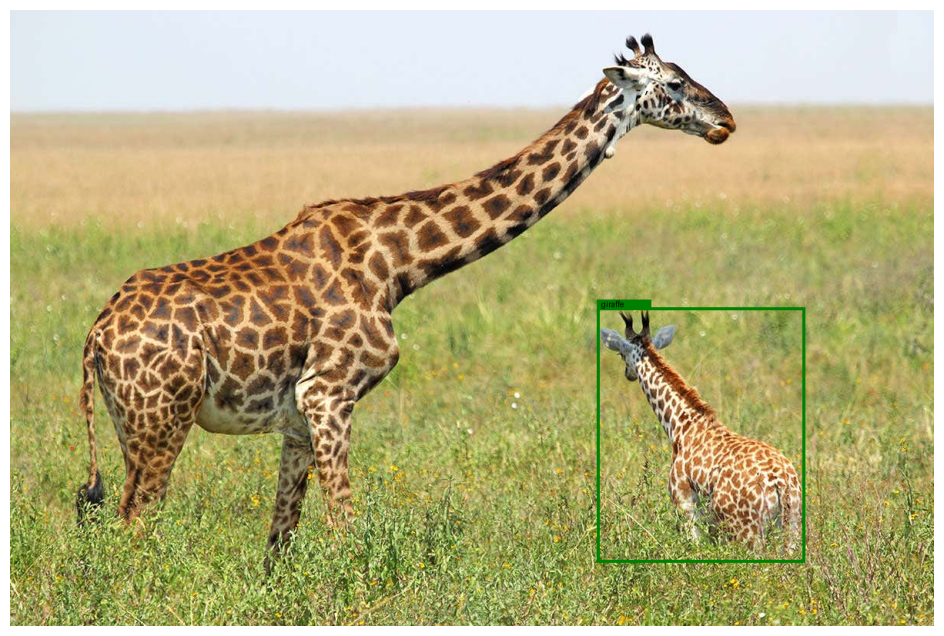

In [11]:
image_url = "https://images.newscientist.com/wp-content/uploads/2018/10/30192224/da7bdk.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")
ground_truth = {'output': 
    [
        {
            'boxes': [
                [762.9100341796875, 386.1495361328125, 1032.3199462890625, 717.8472900390625]
            ], 
            'text': ['giraffe']
        }
    ]
}
visualize_detection(ground_truth, image, color="green") # Visualize bounding box with ground_truth

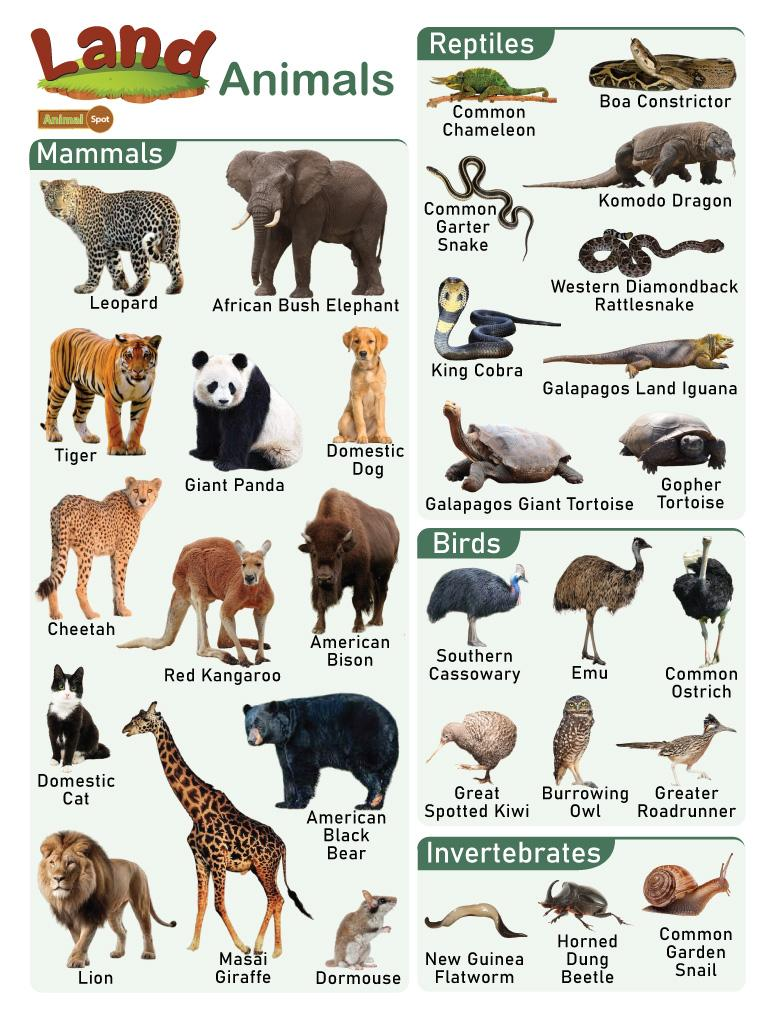

In [12]:
image_url = "https://www.animalspot.net/wp-content/uploads/2023/07/Land-Animals.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")
image

In [13]:
json_string = '{"search_image": "https://www.animalspot.net/wp-content/uploads/2023/07/Land-Animals.jpg", \
"queries": [ \
{"prompt_image": "https://cdn.britannica.com/02/152302-050-1A984FCB/African-savanna-elephant.jpg", "prompts": [{"text": "elephant", "box": [272.6648254394531, 147.77137756347656, 1332.71044921875, 958.507568359375], "box_threshold": 0.1, "multimodal_threshold": 0.15}]}, \
{"prompt_image": "https://images.newscientist.com/wp-content/uploads/2018/10/30192224/da7bdk.jpg", "prompts": [{"text": "giraffe", "box": [762.9100341796875, 386.1495361328125, 1032.3199462890625, 717.8472900390625], "box_threshold": 0.1, "multimodal_threshold": 0.2}]} \
]}'

response = sm_runtime.invoke_endpoint(
    EndpointName="zero-marketplace",
    Body=json_string,
    ContentType="application/json",
)

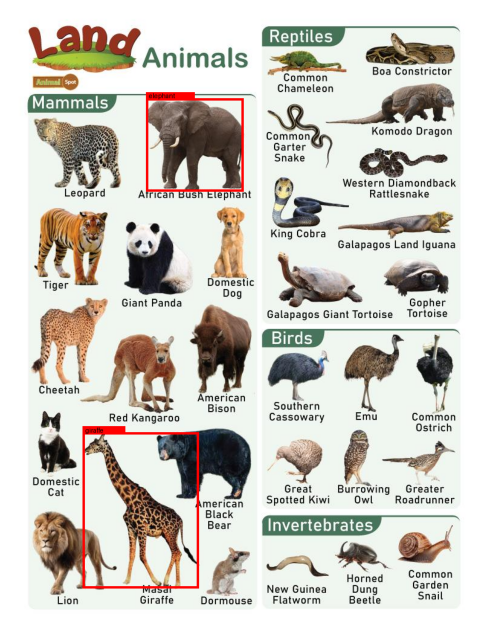

In [14]:
detection_result = json.load(response["Body"])
visualize_detection(detection_result, image)